In [1]:
#importing Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"C:\Users\ABHINANDAN\Desktop\data science\New folder\DSData-master\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

As mentioned in problem statement, the Happiness score is not dependent on Country , Region , Happiness Rank so we can drop these features.

In [5]:
#lets drop unwanted columns
drop_columns = ['Country', 'Region', 'Happiness Rank']
df = df.drop(columns = drop_columns,axis = 1)

In [6]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df.shape

(158, 9)

In [8]:
df.isna().sum()          #To check is there any null value in the dataset

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The Data looks good, as there is no any missing data and data distribution also looks proper.

In [10]:
df.drop_duplicates(inplace=True)    #droping the duplicate values if presents.
df.shape

(158, 9)

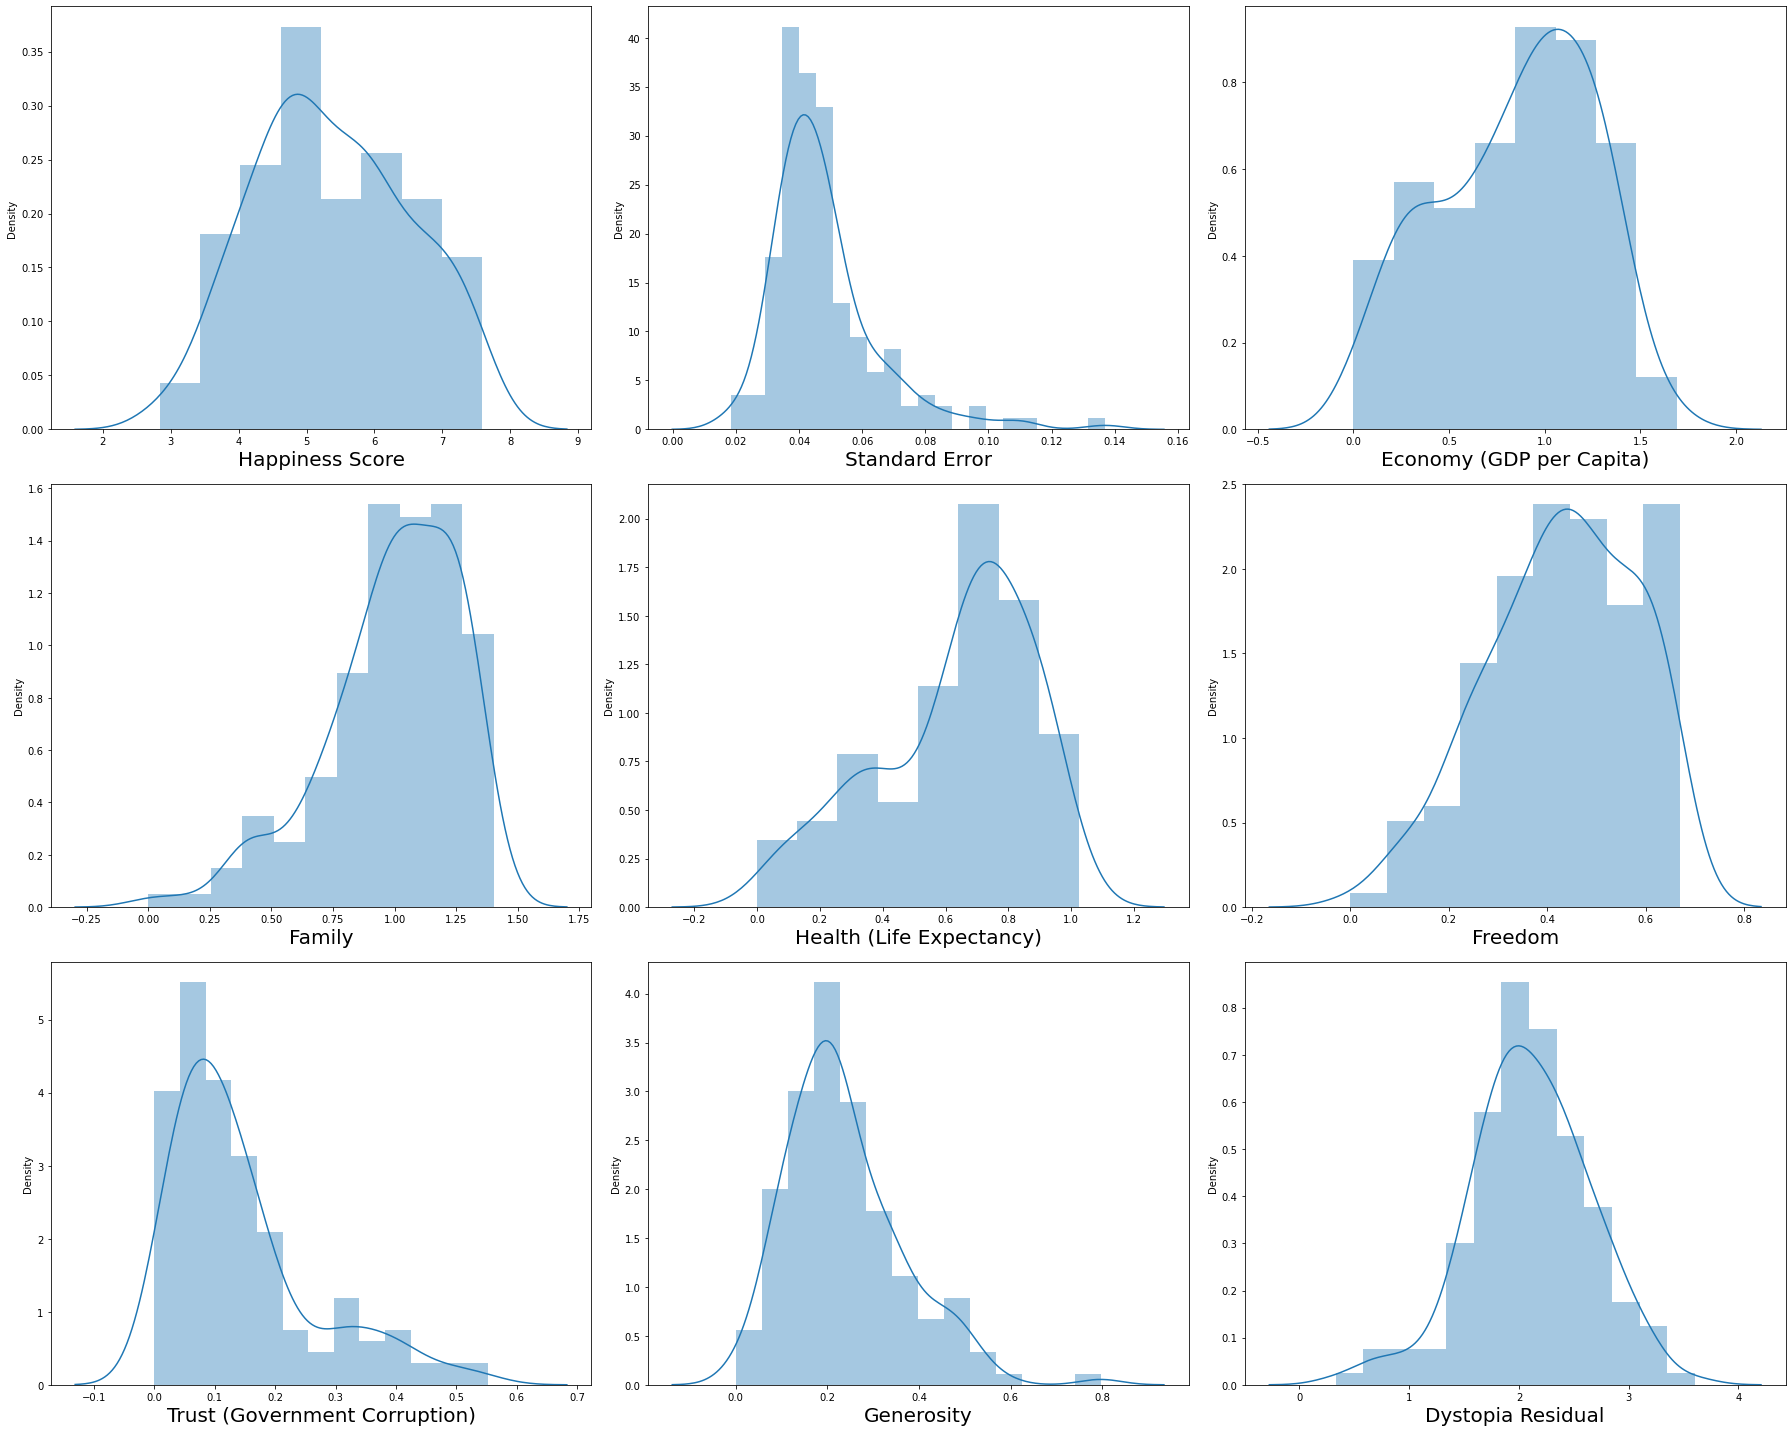

In [11]:
#Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        #plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

By observing above distribution plots its seems that the data is mostly distributed normally.
In Standard Error,Generosity columns there is some skewness, but because the data is not so large we are not removing outliers

In [12]:
#Divide dataset into features and labels
y = df["Happiness Score"]
x = df.drop(columns = ["Happiness Score"])

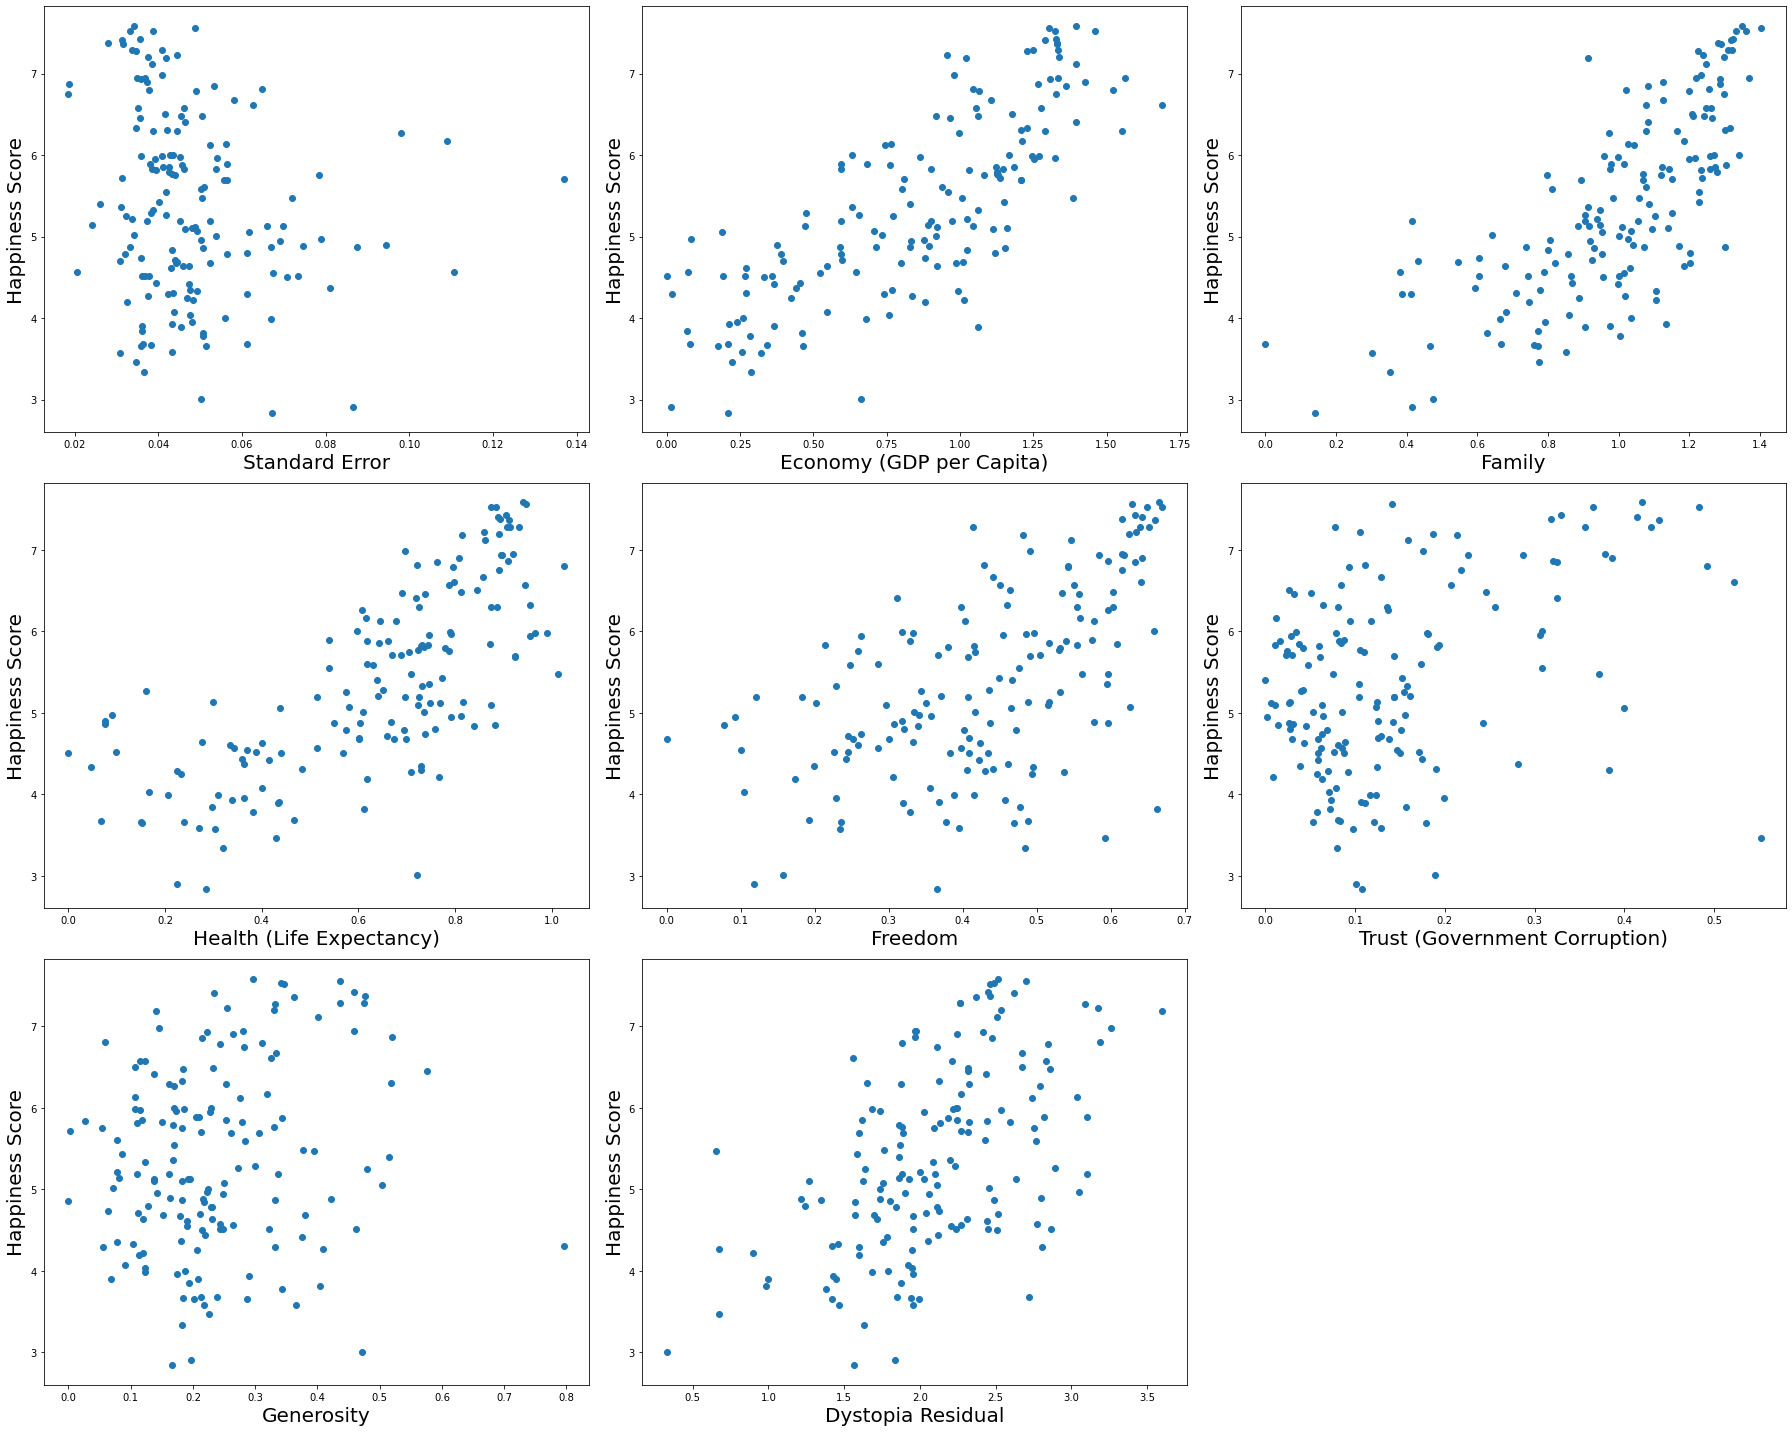

In [13]:
#visualizing relationship between label and features
plt.figure(figsize = (25,20))
plotnumber = 1
for column in x:
    if plotnumber <=8:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Happiness Score',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

By seeing these scatter plots representing relationship between label and features, its difficult to decide which feature is not in good relation with label.
Hence we are not removing any feature.

In [14]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 15)

In [15]:
#In this dataset label is contuinuous data, hence we are using LinearRegression algorithm to build the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = regression.predict(x_test)

In [18]:
regression.score(x_train,y_train)
r2_score(y_test,y_pred)

0.9999999249459839

In [19]:
regression.score(x_test,y_test)

0.9999999249459839

In [20]:
#it seems the model is overfitting

In [21]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [22]:
#let's check accuracy Using Lasso regression model
Lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
Lassocv.fit(x_train,y_train)

alpha = Lassocv.alpha_
alpha

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.9999995177612554

In [23]:
#let's check accuracy Using Ridge regression model
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.9999999244119812

Here we can conclude that Ridge Regression Model is giving slightly more accuracy than Lasso Regression Model

In [25]:
import joblib
joblib.dump(ridge_model,"WorldHappiness.pkl")

['WorldHappiness.pkl']